# **Imports and load Data sets**

In [1]:
# import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn import pipeline, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor as ANN
from sklearn.ensemble import AdaBoostRegressor as AdaBoost
from xgboost import XGBRegressor
from datetime import datetime
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [2]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [3]:
# set listes of files names and one list of given names for the future dataFrames

OHLC_names = ['./ETHUSDT_1440.csv' , './XBTUSDT_1440.csv', './XDGUSDT_1440.csv', './LTCUSDT_1440.csv', './XRPUSDT_1440.csv']
social_names = ['./Ethereum (ETH) social.csv' , './Bitcion (BTC) social.csv', './Dogecoin(DOGE) social.csv', './Litecoin(LTC) social.csv', './Ripple (XRP) social.csv']
df_names = ['ETH_df', 'BTC_df', 'DOGE_df', 'LTC_df', 'XRP_df']

In [4]:
extra_doge_df = pd.read_csv('./Binance_DOGEUSDT_d.csv')
extra_doge_df['Date'] = extra_doge_df['Date'].apply(lambda x: x[: 10])
extra_doge_df['Date'] = extra_doge_df['Date'].apply(lambda x: x.replace("/", "-"))
extra_doge_df['Date'] = extra_doge_df['Date'].apply(lambda x: x.split(" ")[0])
extra_doge_df['Date'] = pd.to_datetime(extra_doge_df['Date'])

In [5]:
# merge OHLC and social data bases by the OHLC Date 

def create_merged_df_by_dates(df1_name, df2_name):
  df1 = pd.read_csv(df1_name) # OHLC
  df2 = pd.read_csv(df2_name) # social

  df1.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trades']
  df1['Date'] = pd.to_datetime(df1['Date'], unit='s')

  if df1_name == './XDGUSDT_1440.csv':
    df1 = extra_doge_df.merge(df1, how='left')

  df2['Date'] = df2['Date'].apply(lambda x: x[: 10])
  df2['Date'] = pd.to_datetime(df2['Date'])
    
  all_data = df1.merge(df2, how="left")
  all_data.sort_values(by='Date', ascending=True, inplace=True)
  return all_data

In [6]:
# create dictionary of all the data frames - all_dfs[Data Frame Name] = Data Frame

all_dfs = {}
for x,y,z in zip(OHLC_names, social_names, df_names):
    all_dfs[z] = create_merged_df_by_dates(x,y)
  

In [7]:
# display our dictionary of all the data

for x in all_dfs:
  print("**** ",x," ****")
  display(all_dfs[x].sample(5))
  print(all_dfs[x].shape)
  print()

****  ETH_df  ****


,Date,Open,High,Low,Close,Volume,Trades,Price,Social Dominance,Social Volume,Twitter Followers,Active social users (Telegram),Twitter Followers 24h,Twitter Followers 7d
179,2020-06-16,231.17,235.90,229.46,235.71,981.130961,357,233.028279,10.239303,14393.0,460833.0,24372.0,63.0,598.0
110,2020-04-08,163.81,173.98,163.81,172.99,940.907404,527,172.641734,7.789947,13326.0,452871.0,18394.0,43.0,271.0
499,2021-05-02,2945.75,2984.73,2853.96,2954.39,3452.421381,4114,3522.783190,13.992217,94866.0,1044652.0,93263.0,7259.0,57260.0
120,2020-04-18,170.80,188.80,170.80,186.81,1249.122856,395,182.599575,9.261415,17739.0,453865.0,24369.0,88.0,553.0
57,2020-02-15,287.93,288.00,252.55,263.77,1064.232451,796,259.763963,13.959231,25088.0,451751.0,23645.0,219.0,923.0


(651, 14)

****  BTC_df  ****


,Date,Open,High,Low,Close,Volume,Trades,Social Dominance (BTC),Social Volume (BTC),Twitter Followers (BTC),Twitter Followers 24h (BTC),Twitter Followers 7d (BTC),Price (BTC),Active social users (Telegram) (BTC)
1318,2017-05-29,2129.343,2326.3300,2051.68100,2245.27300,4466.552589,15405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1402,2017-08-21,4076.001,4116.9690,3996.00000,4005.70400,5070.671144,20285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,2015-03-03,278.000,280.0947,264.68794,276.45248,24.928836,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2407,2020-05-22,9057.500,9261.2000,8925.00000,9169.00000,5948.228464,22655,37.59516,62709.0,101047.0,-63.0,-60.0,9181.017948,NaN
1466,2017-10-24,5902.600,5910.0000,5511.00000,5545.50000,5791.631927,21556,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(2904, 14)

****  DOGE_df  ****


,Date,Open,High,Low,Close,Volume,Trades,Price (DOGE),Social Dominance (DOGE),Social Volume (DOGE),Active social users (Telegram) (DOGE),Twitter Followers (DOGE),Twitter Followers 24h (DOGE),Twitter Followers 7d (DOGE)
23,2022-02-20,0.140900,0.141100,0.135000,0.136600,5.085760e+08,82037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,2020-08-10,0.003471,0.003565,0.003382,0.003505,1.971519e+09,39259,0.003484,0.556214,1144.0,NaN,151022.0,3.0,166.0
61,2022-01-13,0.162700,0.178100,0.161300,0.171700,2.116971e+09,608901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,2021-05-17,0.513400,0.516360,0.455900,0.487890,4.188607e+09,3189592,0.333123,15.765618,123408.0,NaN,1518562.0,26053.0,170108.0
243,2021-07-15,0.197590,0.200890,0.180510,0.185340,9.667971e+08,334500,0.190349,8.101743,28947.0,NaN,1978619.0,2249.0,21654.0


(614, 14)

****  LTC_df  ****


,Date,Open,High,Low,Close,Volume,Trades,Price (LTC),Social Dominance (LTC),Social Volume (LTC),Active social users (Telegram) (LTC),Twitter Followers (LTC),Twitter Followers 24h (LTC),Twitter Followers 7d (LTC)
255,2021-01-11,170.22001,174.88646,113.90000,140.59001,14143.981531,3311,147.421347,1.839029,5110.0,51473.0,32833.0,16.0,57.0
401,2021-06-06,172.54306,179.77115,172.49212,176.20133,1472.010762,548,172.138652,0.649204,3030.0,62095.0,38698.0,24.0,155.0
333,2021-03-30,194.22703,199.80545,190.31559,196.13996,1308.328610,780,197.499093,1.271588,4394.0,54946.0,35873.0,-18.0,209.0
444,2021-07-19,119.81729,120.59902,111.82813,113.01029,9492.719217,1023,117.459889,0.672881,2547.0,40675.0,39181.0,20.0,55.0
345,2021-04-11,256.81171,263.23082,245.19999,253.50133,6123.714238,3710,279.748406,1.284355,6045.0,103666.0,36580.0,71.0,357.0


(518, 14)

****  XRP_df  ****


,Date,Open,High,Low,Close,Volume,Trades,Price (XRP),Social Dominance (XRP),Social Volume (XRP),Active social users (Telegram) (XRP),Twitter Followers (XRP),Twitter Followers 24h (XRP),Twitter Followers 7d (XRP)
1530,2021-07-28,0.64467,0.75324,0.63183,0.73364,2.949992e+07,10369,0.725445,1.171134,4815.0,39187.0,1936958.0,3568.0,9976.0
1451,2021-05-10,1.53661,1.62821,1.20000,1.39233,4.359412e+07,23068,1.274748,1.401166,11602.0,101916.0,1659343.0,12128.0,76812.0
796,2019-07-25,0.31545,0.32386,0.31156,0.31300,1.105152e+07,2834,0.320909,2.758003,5627.0,23256.0,936525.0,225.0,915.0
1345,2021-01-24,0.27189,0.27789,0.26800,0.27357,1.818769e+07,3749,0.252003,2.599718,5190.0,44938.0,1074237.0,1037.0,6788.0
472,2018-09-04,0.33416,0.34000,0.32850,0.33056,1.772019e+06,792,0.283601,2.404594,6098.0,39196.0,888938.0,102.0,725.0


(1595, 14)



In [8]:
all_dfs["BTC_df"] = all_dfs["BTC_df"][['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trades',
       'Price (BTC)',
       'Social Dominance (BTC)', 'Social Volume (BTC)',
       'Active social users (Telegram) (BTC)',
       'Twitter Followers (BTC)', 'Twitter Followers 24h (BTC)',
       'Twitter Followers 7d (BTC)']]

all_dfs["BTC_df"].columns 

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trades',
       'Price (BTC)', 'Social Dominance (BTC)', 'Social Volume (BTC)',
       'Active social users (Telegram) (BTC)', 'Twitter Followers (BTC)',
       'Twitter Followers 24h (BTC)', 'Twitter Followers 7d (BTC)'],
      dtype='object')

In [9]:
all_dfs["ETH_df"] = all_dfs["ETH_df"][['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trades', 'Price',
       'Social Dominance', 'Social Volume', 'Active social users (Telegram)',
       'Twitter Followers', 'Twitter Followers 24h', 'Twitter Followers 7d']]
       
all_dfs["ETH_df"].columns 

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trades', 'Price',
       'Social Dominance', 'Social Volume', 'Active social users (Telegram)',
       'Twitter Followers', 'Twitter Followers 24h', 'Twitter Followers 7d'],
      dtype='object')

In [10]:
for x in all_dfs:
  all_dfs[x].columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trades', 'Price(from social)', 'Social Dominance', 'Social Volume', 'Active social users (Telegram)', 'Twitter Followers', 'Twitter Followers 24h', 'Twitter Followers 7d']
  display(all_dfs[x])


,Date,Open,High,Low,Close,Volume,Trades,Price(from social),Social Dominance,Social Volume,Active social users (Telegram),Twitter Followers,Twitter Followers 24h,Twitter Followers 7d
0,2019-12-20,128.30,129.00,126.00,128.22,72.532964,88,126.555535,9.335943,11174.0,18356.0,448522.0,56.0,219.0
1,2019-12-21,127.90,127.90,126.91,126.91,42.387731,49,126.555535,9.335943,11174.0,18356.0,448522.0,43.0,219.0
2,2019-12-22,126.51,133.23,126.51,131.99,60.557974,34,126.555535,9.335943,11174.0,18356.0,448522.0,-7.0,219.0
3,2019-12-23,132.58,134.06,126.87,127.75,144.056462,96,126.555535,9.335943,11174.0,18356.0,448522.0,10.0,219.0
4,2019-12-24,127.65,128.97,126.73,127.91,129.017613,205,126.555535,9.335943,11174.0,18356.0,448522.0,59.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,2021-09-26,2924.42,3113.41,2739.38,3061.22,4594.706720,4233,2853.143373,10.184700,36552.0,50840.0,1611954.0,2849.0,17839.0
647,2021-09-27,3058.20,3162.92,2924.81,2924.81,1594.995883,2169,2853.143373,10.184700,36552.0,50840.0,1611954.0,2225.0,17839.0
648,2021-09-28,2923.35,2968.28,2790.00,2804.90,2411.412692,2388,2853.143373,10.184700,36552.0,50840.0,1611954.0,2364.0,17839.0
649,2021-09-29,2805.61,2948.00,2785.37,2852.90,1948.342421,1879,2853.143373,10.184700,36552.0,50840.0,1611954.0,3384.0,17839.0


,Date,Open,High,Low,Close,Volume,Trades,Price(from social),Social Dominance,Social Volume,Active social users (Telegram),Twitter Followers,Twitter Followers 24h,Twitter Followers 7d
0,2013-10-07,123.61000,123.61000,123.61,123.61,0.100000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-08,123.91000,124.19000,123.90,124.18,3.991600,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-10-09,124.01687,124.01687,123.84,123.84,2.823000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-10-10,125.85000,125.86000,125.85,125.86,2.000000,2,142.550000,100.000000,5866.0,NaN,NaN,NaN,NaN
4,2013-10-12,127.50000,127.50000,127.00,127.00,4.000000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,2021-09-26,42710.10000,43930.40000,40802.70,43204.60,2250.763237,24215,41564.363481,25.362177,91405.0,NaN,138712.0,174.0,1189.0
2900,2021-09-27,43175.20000,44333.00000,42120.70,42176.30,1977.899642,21018,41564.363481,25.362177,91405.0,NaN,138712.0,130.0,1189.0
2901,2021-09-28,42176.30000,42750.00000,40875.60,41038.40,2231.712572,20996,41564.363481,25.362177,91405.0,NaN,138712.0,178.0,1189.0
2902,2021-09-29,41016.00000,42579.90000,40772.20,41524.80,1708.258859,20501,41564.363481,25.362177,91405.0,NaN,138712.0,139.0,1189.0


,Date,Open,High,Low,Close,Volume,Trades,Price(from social),Social Dominance,Social Volume,Active social users (Telegram),Twitter Followers,Twitter Followers 24h,Twitter Followers 7d
613,2020-07-10,0.003989,0.003989,0.003340,0.003535,7.578205e+09,168920,0.003085,4.19527,5935.0,NaN,148526.0,688.0,3886.0
612,2020-07-11,0.003535,0.003960,0.003411,0.003812,6.154155e+09,109150,0.003085,4.19527,5935.0,NaN,148526.0,376.0,3886.0
611,2020-07-12,0.003810,0.003861,0.003573,0.003648,2.832683e+09,60981,0.003085,4.19527,5935.0,NaN,148526.0,170.0,3886.0
610,2020-07-13,0.003647,0.003660,0.002942,0.003159,7.754496e+09,141223,0.003085,4.19527,5935.0,NaN,148526.0,133.0,3886.0
609,2020-07-14,0.003159,0.003401,0.003014,0.003293,4.978543e+09,110355,0.003085,4.19527,5935.0,NaN,148526.0,1.0,3886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-03-11,0.116900,0.118600,0.113700,0.115500,4.075577e+08,70497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-12,0.115400,0.117300,0.114600,0.114700,2.146894e+08,42957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-13,0.114700,0.116400,0.109900,0.111400,4.019400e+08,76195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-14,0.111400,0.122000,0.110200,0.113900,9.487245e+08,142648,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,Open,High,Low,Close,Volume,Trades,Price(from social),Social Dominance,Social Volume,Active social users (Telegram),Twitter Followers,Twitter Followers 24h,Twitter Followers 7d
0,2020-05-01,46.97540,46.97540,46.70604,46.87860,3.480820,4,45.942866,1.943012,3868.0,26289.0,32014.0,-9.0,1.0
1,2020-05-02,46.87834,49.66994,46.87834,47.68265,337.152045,30,45.942866,1.943012,3868.0,26289.0,32014.0,0.0,1.0
2,2020-05-03,49.32349,49.32349,47.00000,47.01930,69.774001,26,45.942866,1.943012,3868.0,26289.0,32014.0,-5.0,1.0
3,2020-05-04,46.15715,46.87017,44.74676,46.57272,391.387690,52,45.942866,1.943012,3868.0,26289.0,32014.0,3.0,1.0
4,2020-05-05,46.94168,47.64789,46.07862,46.07862,132.995373,23,45.942866,1.943012,3868.0,26289.0,32014.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2021-09-26,150.52776,153.25232,142.48387,150.53833,842.831677,580,144.918618,0.609786,2200.0,50840.0,40171.0,-5.0,28.0
514,2021-09-27,150.76878,154.72986,145.00000,145.00000,1596.633302,530,144.918618,0.609786,2200.0,50840.0,40171.0,5.0,28.0
515,2021-09-28,145.00000,148.70783,140.22392,140.22392,2403.333945,619,144.918618,0.609786,2200.0,50840.0,40171.0,8.0,28.0
516,2021-09-29,140.40048,150.10832,140.00000,144.81167,1608.968108,352,144.918618,0.609786,2200.0,50840.0,40171.0,7.0,28.0


,Date,Open,High,Low,Close,Volume,Trades,Price(from social),Social Dominance,Social Volume,Active social users (Telegram),Twitter Followers,Twitter Followers 24h,Twitter Followers 7d
0,2017-05-19,0.371779,0.371779,0.280000,0.320106,1.060845e+07,6224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-20,0.329228,0.370000,0.290128,0.344005,8.184248e+06,4719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-05-21,0.344012,0.363981,0.320000,0.323489,4.263754e+06,3329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-05-22,0.323491,0.335134,0.221500,0.303060,1.436186e+07,8228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-05-23,0.295898,0.349000,0.280003,0.322223,6.275661e+06,5524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,2021-09-26,0.939490,0.956340,0.893220,0.944380,1.102470e+07,3314,0.928349,1.581914,5873.0,50840.0,2058906.0,1980.0,13540.0
1591,2021-09-27,0.943590,0.981660,0.920340,0.922440,4.146171e+06,2407,0.928349,1.581914,5873.0,50840.0,2058906.0,1491.0,13540.0
1592,2021-09-28,0.921870,0.942420,0.891150,0.893600,7.048429e+06,2725,0.928349,1.581914,5873.0,50840.0,2058906.0,1288.0,13540.0
1593,2021-09-29,0.892610,0.991910,0.886570,0.927510,1.193580e+07,4692,0.928349,1.581914,5873.0,50840.0,2058906.0,3173.0,13540.0


In [11]:
# look for 
def look_for_empty_lines():
  for x in all_dfs:
    print("**** ",x," ****")
    print("Number of lines in ", x, "is: ",all_dfs[x].shape[0])
    display(all_dfs[x].isna().sum())
    print()

In [12]:
look_for_empty_lines()

****  ETH_df  ****
Number of lines in  ETH_df is:  651


Date                              0
Open                              0
High                              0
Low                               0
Close                             0
Volume                            0
Trades                            0
Price(from social)                7
Social Dominance                  7
Social Volume                     7
Active social users (Telegram)    7
Twitter Followers                 7
Twitter Followers 24h             7
Twitter Followers 7d              7
dtype: int64


****  BTC_df  ****
Number of lines in  BTC_df is:  2904


Date                                 0
Open                                 0
High                                 0
Low                                  0
Close                                0
Volume                               0
Trades                               0
Price(from social)                1708
Social Dominance                  1708
Social Volume                     1708
Active social users (Telegram)    2904
Twitter Followers                 1990
Twitter Followers 24h             1991
Twitter Followers 7d              1994
dtype: int64


****  DOGE_df  ****
Number of lines in  DOGE_df is:  614


Date                                0
Open                                0
High                                0
Low                                 0
Close                               0
Volume                              0
Trades                              0
Price(from social)                117
Social Dominance                  117
Social Volume                     117
Active social users (Telegram)    614
Twitter Followers                 117
Twitter Followers 24h             117
Twitter Followers 7d              117
dtype: int64


****  LTC_df  ****
Number of lines in  LTC_df is:  518


Date                              0
Open                              0
High                              0
Low                               0
Close                             0
Volume                            0
Trades                            0
Price(from social)                1
Social Dominance                  1
Social Volume                     1
Active social users (Telegram)    1
Twitter Followers                 1
Twitter Followers 24h             1
Twitter Followers 7d              1
dtype: int64


****  XRP_df  ****
Number of lines in  XRP_df is:  1595


Date                                0
Open                                0
High                                0
Low                                 0
Close                               0
Volume                              0
Trades                              0
Price(from social)                278
Social Dominance                  278
Social Volume                     278
Active social users (Telegram)    278
Twitter Followers                 319
Twitter Followers 24h             320
Twitter Followers 7d              325
dtype: int64

In [13]:
# set NaN to 0

# for x in all_dfs:
#   all_dfs[x].fillna(0, inplace=True)
# look_for_empty_lines()

In [14]:
# drop rows with NAN

for x in all_dfs:
  if x == "DOGE_df" or x == "BTC_df":
    all_dfs[x] = all_dfs[x].drop(labels='Active social users (Telegram)', axis=1)
    all_dfs[x] = all_dfs[x].dropna()
    all_dfs[x]['Active social users (Telegram)'] = 0
  else: 
    all_dfs[x] = all_dfs[x].dropna()


look_for_empty_lines()

****  ETH_df  ****
Number of lines in  ETH_df is:  644


Date                              0
Open                              0
High                              0
Low                               0
Close                             0
Volume                            0
Trades                            0
Price(from social)                0
Social Dominance                  0
Social Volume                     0
Active social users (Telegram)    0
Twitter Followers                 0
Twitter Followers 24h             0
Twitter Followers 7d              0
dtype: int64


****  BTC_df  ****
Number of lines in  BTC_df is:  910


Date                              0
Open                              0
High                              0
Low                               0
Close                             0
Volume                            0
Trades                            0
Price(from social)                0
Social Dominance                  0
Social Volume                     0
Twitter Followers                 0
Twitter Followers 24h             0
Twitter Followers 7d              0
Active social users (Telegram)    0
dtype: int64


****  DOGE_df  ****
Number of lines in  DOGE_df is:  497


Date                              0
Open                              0
High                              0
Low                               0
Close                             0
Volume                            0
Trades                            0
Price(from social)                0
Social Dominance                  0
Social Volume                     0
Twitter Followers                 0
Twitter Followers 24h             0
Twitter Followers 7d              0
Active social users (Telegram)    0
dtype: int64


****  LTC_df  ****
Number of lines in  LTC_df is:  517


Date                              0
Open                              0
High                              0
Low                               0
Close                             0
Volume                            0
Trades                            0
Price(from social)                0
Social Dominance                  0
Social Volume                     0
Active social users (Telegram)    0
Twitter Followers                 0
Twitter Followers 24h             0
Twitter Followers 7d              0
dtype: int64


****  XRP_df  ****
Number of lines in  XRP_df is:  1270


Date                              0
Open                              0
High                              0
Low                               0
Close                             0
Volume                            0
Trades                            0
Price(from social)                0
Social Dominance                  0
Social Volume                     0
Active social users (Telegram)    0
Twitter Followers                 0
Twitter Followers 24h             0
Twitter Followers 7d              0
dtype: int64

In [15]:
# divide the data to features and target
X = {}
t = {}
for x in all_dfs:
  t[x] = all_dfs[x]['Close'].copy()
  X[x] = all_dfs[x].drop(['Close'], axis=1)

print('t')
display(t)
print()
print('X')
display(X)

t


{'BTC_df': 1979     3972.4
 1980     3982.1
 1981     3982.5
 1982     3969.3
 1983     3905.9
          ...   
 2899    43204.6
 2900    42176.3
 2901    41038.4
 2902    41524.8
 2903    43798.7
 Name: Close, Length: 910, dtype: float64, 'DOGE_df': 613    0.003535
 612    0.003812
 611    0.003648
 610    0.003159
 609    0.003293
          ...   
 114    0.225500
 113    0.219500
 112    0.226600
 111    0.217000
 110    0.220900
 Name: Close, Length: 497, dtype: float64, 'ETH_df': 0       128.22
 1       126.91
 2       131.99
 3       127.75
 4       127.91
         ...   
 646    3061.22
 647    2924.81
 648    2804.90
 649    2852.90
 650    3006.13
 Name: Close, Length: 644, dtype: float64, 'LTC_df': 0       46.87860
 1       47.68265
 2       47.01930
 3       46.57272
 4       46.07862
          ...    
 513    150.53833
 514    145.00000
 515    140.22392
 516    144.81167
 517    153.08975
 Name: Close, Length: 517, dtype: float64, 'XRP_df': 299     0.68179
 300     0.67780


X


{'BTC_df':            Date     Open     High      Low       Volume  Trades  \
 1979 2019-03-21   4030.9   4064.4   3871.3  4867.144416   12386   
 1980 2019-03-22   3972.5   3999.0   3960.0  2481.959080    6609   
 1981 2019-03-23   3982.1   4000.4   3961.0  1616.990068    4791   
 1982 2019-03-24   3982.4   3982.4   3944.4  2067.316000    5112   
 1983 2019-03-25   3968.6   3976.6   3855.5  4822.948801    9393   
 ...         ...      ...      ...      ...          ...     ...   
 2899 2021-09-26  42710.1  43930.4  40802.7  2250.763237   24215   
 2900 2021-09-27  43175.2  44333.0  42120.7  1977.899642   21018   
 2901 2021-09-28  42176.3  42750.0  40875.6  2231.712572   20996   
 2902 2021-09-29  41016.0  42579.9  40772.2  1708.258859   20501   
 2903 2021-09-30  41523.9  44100.0  41423.7  3053.646291   37817   
 
       Price(from social)  Social Dominance  Social Volume  Twitter Followers  \
 1979         4087.066230         31.472370        45771.0            99219.0   
 1980     

In [16]:
scaler = StandardScaler()
column_names = ['Open', 'High', 'Low', 'Volume', 'Trades', 'Price(from social)', 'Social Dominance', 'Social Volume', 'Active social users (Telegram)', 'Twitter Followers', 'Twitter Followers 24h', 'Twitter Followers 7d']
ct_enc_std = ColumnTransformer([("standard", StandardScaler(), column_names)])

for x in X:
  X[x] = pd.DataFrame(ct_enc_std.fit_transform(X[x]), columns=column_names)
  display(X[x].sample(5))

,Open,High,Low,Volume,Trades,Price(from social),Social Dominance,Social Volume,Active social users (Telegram),Twitter Followers,Twitter Followers 24h,Twitter Followers 7d
418,0.561042,0.559796,0.599507,0.701982,0.729405,0.590794,-0.197215,0.387229,-0.857121,-0.116580,0.708525,0.860588
417,0.558623,0.535771,0.590201,-0.040385,0.278472,0.590794,-0.197215,0.387229,-0.857121,-0.116580,0.888637,0.860588
215,-0.804059,-0.792682,-0.798770,-0.515683,-0.558320,-0.803908,0.563879,-0.662199,-0.481780,-0.717030,-0.598707,-0.658925
307,-0.675112,-0.663266,-0.659311,0.117010,-0.395204,-0.692720,0.382619,-0.763358,-0.167429,-0.635626,-0.577562,-0.645593
443,0.686424,0.626031,0.696920,-0.322100,-0.061806,0.568805,-0.291210,0.195754,-0.567345,0.127891,0.771583,0.638649


,Open,High,Low,Volume,Trades,Price(from social),Social Dominance,Social Volume,Active social users (Telegram),Twitter Followers,Twitter Followers 24h,Twitter Followers 7d
90,-0.643166,-0.643959,-0.628772,-0.410851,-0.654653,-0.644011,0.328243,0.125037,0.0,-0.593859,-0.276114,-0.475295
468,-0.639742,-0.645282,-0.625427,-0.608967,-0.745398,-0.646531,1.176185,-0.701700,0.0,-0.538104,-0.582323,-0.728567
751,1.790731,1.729783,1.713910,-0.224043,0.895525,2.064868,-1.542779,1.956573,0.0,0.653797,1.242686,1.431332
650,1.006565,1.142721,1.047455,2.234298,3.254512,1.023666,1.962910,1.484220,0.0,-0.444823,-0.251617,-0.931184
859,1.524909,1.508617,1.613531,-0.613983,0.065064,1.515907,-1.389594,1.047929,0.0,2.352730,1.365170,1.601530


,Open,High,Low,Volume,Trades,Price(from social),Social Dominance,Social Volume,Active social users (Telegram),Twitter Followers,Twitter Followers 24h,Twitter Followers 7d
185,-0.874144,-0.869575,-0.910229,0.232562,-0.283602,-0.889765,-0.536272,-0.514167,0.0,-0.950862,-0.475512,-0.554176
477,0.851047,0.764357,0.932283,-0.316224,-0.279795,0.819978,-0.338352,-0.133215,0.0,1.621888,0.616206,0.720299
147,-0.918271,-0.910444,-0.935935,-0.304078,-0.403513,-0.927533,-0.763466,-0.610371,0.0,-0.989984,-0.575945,-0.682272
405,1.069241,0.947272,1.039045,-0.295124,-0.264088,1.087708,-0.194062,-0.226312,0.0,1.177449,-0.362270,-0.355661
137,-0.916442,-0.904992,-0.933905,0.671844,-0.324361,-0.923598,-0.715700,-0.595536,0.0,-0.990663,-0.563975,-0.680260


,Open,High,Low,Volume,Trades,Price(from social),Social Dominance,Social Volume,Active social users (Telegram),Twitter Followers,Twitter Followers 24h,Twitter Followers 7d
196,-0.850152,-0.797432,-0.818964,-0.076928,-0.347752,-0.692879,1.831269,-0.217642,-0.484203,-0.854180,-0.621752,-0.652233
458,0.228963,0.161834,0.264929,-0.140262,-0.336264,0.239415,-0.889831,-0.213435,-0.113659,1.455156,-0.621752,-0.479073
178,-0.881382,-0.889044,-0.891640,-0.532272,-0.597108,-0.934746,0.846390,-0.736671,-0.459489,-0.849594,-0.453851,-0.652233
115,-0.841322,-0.844499,-0.814345,-0.708092,-0.647114,-0.900318,-0.370291,-0.740878,-0.166215,-0.834526,-0.160025,-0.557782
468,0.552363,0.678698,0.680099,1.518234,3.309460,0.574492,-1.315230,-0.202392,0.832666,1.499705,0.259726,-0.439719


,Open,High,Low,Volume,Trades,Price(from social),Social Dominance,Social Volume,Active social users (Telegram),Twitter Followers,Twitter Followers 24h,Twitter Followers 7d
210,0.070841,0.037361,0.120727,-0.362958,-0.368824,0.081190,0.429532,0.307235,-0.371965,-0.513725,-0.552633,-0.365239
958,-0.707511,-0.698198,-0.711850,-0.278415,-0.380193,-0.704541,-0.848496,-1.072417,0.207838,-0.296614,-0.390734,-0.407560
778,-0.789232,-0.771652,-0.779698,-0.221853,-0.401813,-0.828189,-0.376639,-0.354792,-0.601921,-0.366256,-0.421329,-0.436166
963,-0.660407,-0.656671,-0.639465,-0.351435,-0.461599,-0.641798,-0.718405,-0.898367,0.009961,-0.295024,-0.440876,-0.425638
1081,0.233428,0.360967,0.337659,0.182310,0.108654,0.442017,-0.735037,-0.271397,0.759053,0.717029,0.484623,0.439131


****ETH_df****


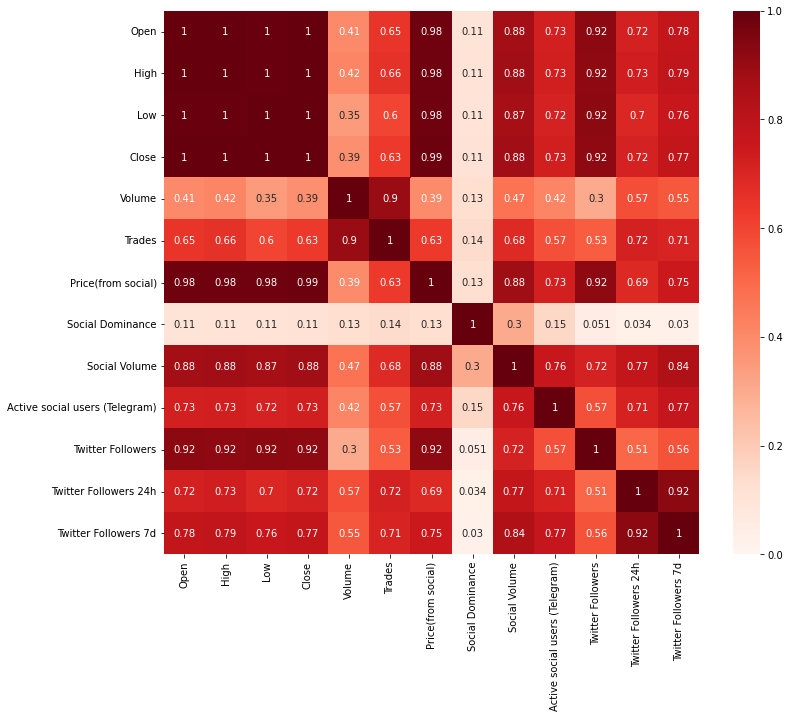

****BTC_df****


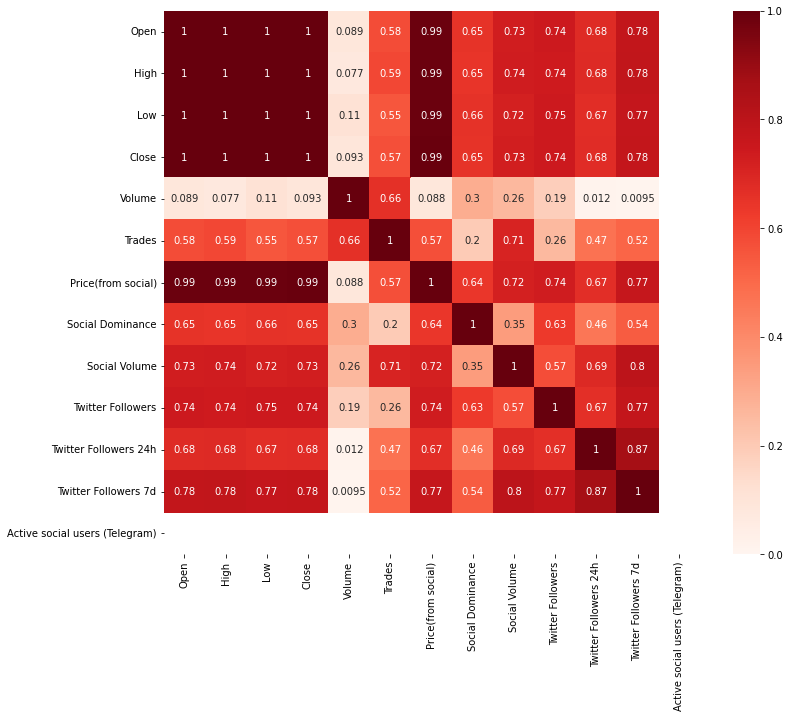

****DOGE_df****


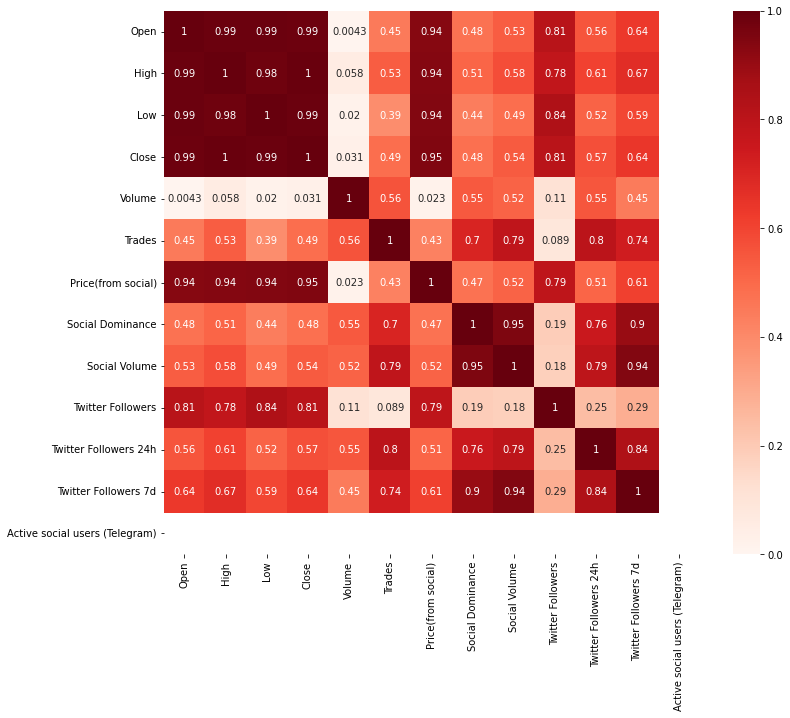

****LTC_df****


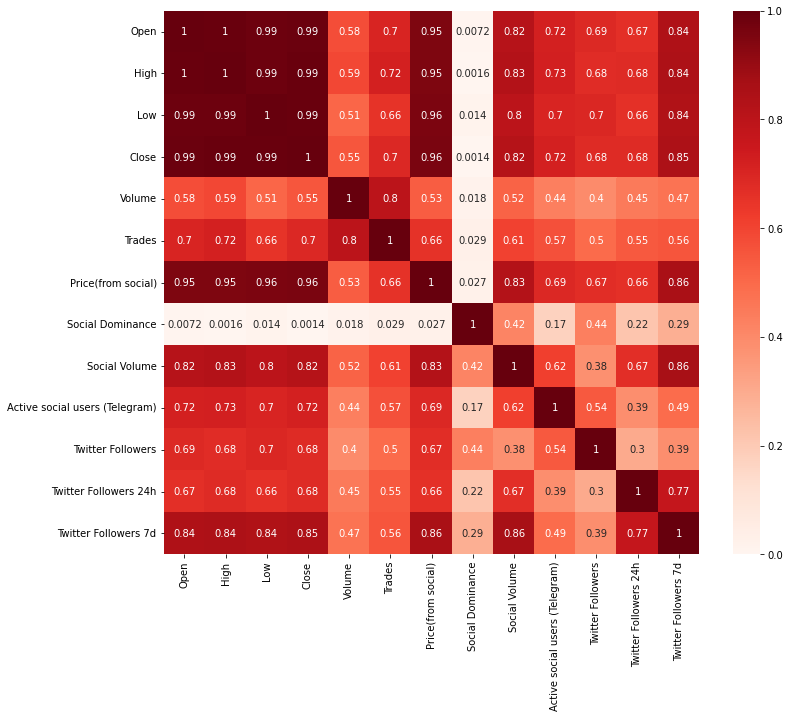

****XRP_df****


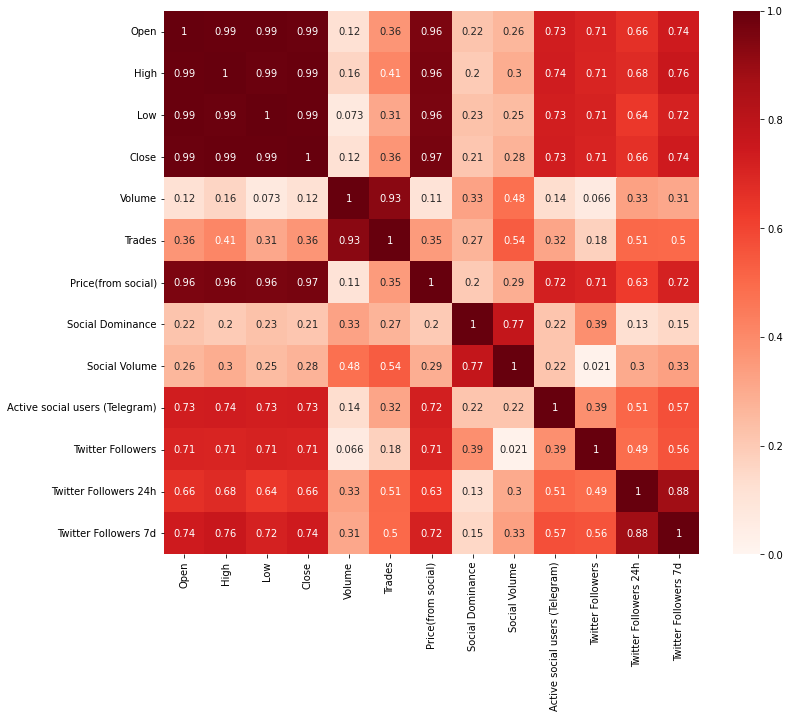

In [17]:
# show absolute correlation between features in a heatmap
for x in all_dfs:
  print("****" + x + "****")
  plt.figure(figsize=(12,10))
  cor = np.abs(all_dfs[x].corr())
  sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
  plt.show()  

In [18]:
# use the given regressor and predict the probabilities of the train and test data **DAY BY DAY!**

def check_reg_score_and_predict_each_day(reg, data_frame, test_column, df_name, reg_name):

  for i in range(TEST_SIZE-1, 0, -1):
    X_train = data_frame.head(data_frame.shape[0] - i+1)
    t_train = test_column.head(data_frame.shape[0] - i+1)
    X_test = data_frame.tail(i).head(1)
    t_test = test_column.tail(i).head(1)

    reg = reg.fit(X_train, t_train)
  # y_train_prob = reg.predict(X_train)
    y_test_prob = reg.predict(X_test)
    if df_name+"_"+reg_name not in predictions:
       predictions[df_name+"_"+reg_name] = [y_test_prob]
    else:
      predictions[df_name+"_"+reg_name].append(y_test_prob)
  
  t_test = test_column.tail(TEST_SIZE-1)
  u = [(a-b)**2 for a,b in zip(t_test,  predictions[df_name+"_"+reg_name])]
  v = [(a-t_test.mean())**2 for a in t_test]
  print("score test:\t")
  print(1 - (float)(sum(u))/sum(v))
  print("\n")

  return (0,1)

In [19]:
# use the given regressor and predict the probabilities of the train and test data **for all TEST_SIZE peroid**

def check_reg_score_and_loss(reg, data_frame, test_column, df_name, reg_name):
  
  X_train = data_frame.head(data_frame.shape[0]-TEST_SIZE)
  X_test = data_frame.tail(TEST_SIZE)
  t_train = test_column.head(data_frame.shape[0]-TEST_SIZE)
  t_test = test_column.tail(TEST_SIZE)

  reg = reg.fit(X_train, t_train)
  y_train_prob = reg.predict(X_train)
  y_test_prob = reg.predict(X_test)
  
  predictions[df_name+"_"+reg_name] = y_test_prob

  # print("score train:\t")
  # print(reg.score(X_train, t_train))
  print("score test:\t")
  print(reg.score(X_test, t_test))
  # print("train mean abs error:\t")
  # print(mean_absolute_error(t_train, y_train_prob))
  # print("test mean abs error:\t")
  # print(mean_absolute_error(t_test, y_test_prob))
  # print("\n")

  return reg.score(X_test,t_test), reg.score(X_train,t_train)

In [20]:
predictions = {}
TEST_SIZE = 100

In [21]:
regressors = {'svm_reg': SVR() ,'ann_reg': ANN(), 'adaBoost_reg': AdaBoost(), 'XGB_reg': XGBRegressor(verbosity = 0)}

In [22]:
# checking and make predictions with check_reg_score_and_predict_each_day

for reg in regressors:
  print(20*"-" + reg + 20*"-"+'\n')
  for x,y in zip(X, t):
    print("****"+x+"****")
    test_score, train_score = check_reg_score_and_loss(regressors[reg], X[x], t[y], x, reg)
    #    check_reg_score_and_predict_each_day(regressors[reg], X[x], t[y], x, reg)
  print(20*"-" + "end of " + reg + 20*"-"+'\n\n')

--------------------svm_reg--------------------

****ETH_df****
score test:	
-14.160947910015834
****BTC_df****
score test:	
-24.139464609446645
****DOGE_df****
score test:	
-0.28542218954445286
****LTC_df****
score test:	
0.5730637773411617
****XRP_df****
score test:	
0.5323966563609805
--------------------end of svm_reg--------------------


--------------------ann_reg--------------------

****ETH_df****
score test:	
-14.472430108011896
****BTC_df****
score test:	
-39.93006904534638
****DOGE_df****
score test:	
-10.67943342106676
****LTC_df****
score test:	
-16.447869031833388
****XRP_df****
score test:	
0.9121722320775018
--------------------end of ann_reg--------------------


--------------------adaBoost_reg--------------------

****ETH_df****
score test:	
0.9629151392068126
****BTC_df****
score test:	
0.9264348393898707
****DOGE_df****
score test:	
0.85592839913983
****LTC_df****
score test:	
0.9335181758984865
****XRP_df****
score test:	
0.9530909117281647
--------------------en

In [23]:
# see if predictions shape for every crypto match to TEST_SIZE

for x in predictions:
  print(x)
  predictions[x] = pd.DataFrame(predictions[x])
  print(predictions[x].shape)

ETH_df_svm_reg
(100, 1)
BTC_df_svm_reg
(100, 1)
DOGE_df_svm_reg
(100, 1)
LTC_df_svm_reg
(100, 1)
XRP_df_svm_reg
(100, 1)
ETH_df_ann_reg
(100, 1)
BTC_df_ann_reg
(100, 1)
DOGE_df_ann_reg
(100, 1)
LTC_df_ann_reg
(100, 1)
XRP_df_ann_reg
(100, 1)
ETH_df_adaBoost_reg
(100, 1)
BTC_df_adaBoost_reg
(100, 1)
DOGE_df_adaBoost_reg
(100, 1)
LTC_df_adaBoost_reg
(100, 1)
XRP_df_adaBoost_reg
(100, 1)
ETH_df_XGB_reg
(100, 1)
BTC_df_XGB_reg
(100, 1)
DOGE_df_XGB_reg
(100, 1)
LTC_df_XGB_reg
(100, 1)
XRP_df_XGB_reg
(100, 1)


In [24]:
# display prices of training data and prediction vs actual price for every crypto

for x in all_dfs:
  coin_name = x.split("_")[0]
  print("**** "+coin_name+" ****")
  fig = go.Figure(data=go.Scatter(x=all_dfs[x]['Date'],y=all_dfs[x]['Close'], mode='lines', name=coin_name+" real prices"))
  for y in predictions:
    pred_name =  y.split("_")[0]
    if  pred_name == coin_name:
      fig.add_trace(go.Scatter(x=all_dfs[x]['Date'].tail(TEST_SIZE-1), y=predictions[y][0],
                        mode='lines',
                        name=y))
  fig.show()

**** ETH ****


**** BTC ****


**** DOGE ****


**** LTC ****


**** XRP ****


In [25]:
all_dfs['BTC_df'].head(5)

,Date,Open,High,Low,Close,Volume,Trades,Price(from social),Social Dominance,Social Volume,Twitter Followers,Twitter Followers 24h,Twitter Followers 7d,Active social users (Telegram)
1979,2019-03-21,4030.9,4064.4,3871.3,3972.4,4867.144416,12386,4087.06623,31.47237,45771.0,99219.0,53.0,37.0,0
1980,2019-03-22,3972.5,3999.0,3960.0,3982.1,2481.959080,6609,4087.06623,31.47237,45771.0,99219.0,-6.0,37.0,0
1981,2019-03-23,3982.1,4000.4,3961.0,3982.5,1616.990068,4791,4087.06623,31.47237,45771.0,99219.0,39.0,37.0,0
1982,2019-03-24,3982.4,3982.4,3944.4,3969.3,2067.316000,5112,4087.06623,31.47237,45771.0,99219.0,59.0,37.0,0
1983,2019-03-25,3968.6,3976.6,3855.5,3905.9,4822.948801,9393,4087.06623,31.47237,45771.0,99219.0,-25.0,37.0,0


In [26]:
# prepare the data for the LSTM modal 

memory_days = 14

X_train_data = {}
y_train_data = {}
all_dfs_tensor_time = all_dfs.copy()
for x in all_dfs_tensor_time:
  all_dfs_tensor_time[x]['Date'] =  all_dfs_tensor_time[x]['Date'].astype('int64')
  all_dfs_tensor_time[x] = pd.DataFrame(scaler.fit_transform(all_dfs_tensor_time[x]), columns = all_dfs[x].columns)
  for i in range(memory_days, all_dfs_tensor_time[x].shape[0] - TEST_SIZE):
    if x not in X_train_data:
      X_train_data[x] = [all_dfs_tensor_time[x].iloc[i-memory_days:i, 4:5] ]#.drop('Close', axis=1)]
      y_train_data[x] = [all_dfs_tensor_time[x].iloc[i, 4]]
    X_train_data[x].append(all_dfs_tensor_time[x].iloc[i-memory_days:i, 4:5] )#.drop('Close', axis=1))
    y_train_data[x].append(all_dfs_tensor_time[x].iloc[i, 4])
  
  X_train_data[x], y_train_data[x] = np.array(X_train_data[x]), np.array(y_train_data[x])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated a

In [27]:
# create test data for the LSTM modal 

X_test_data = {}
y_test_data = {}
for x in all_dfs_tensor_time:

  for i in range(all_dfs_tensor_time[x].shape[0] - TEST_SIZE, all_dfs_tensor_time[x].shape[0]):
    if x not in X_test_data:
      X_test_data[x] = [all_dfs_tensor_time[x].iloc[i-memory_days:i, 4:5] ] #.drop("Close", axis=1)]
      y_test_data[x] = [all_dfs_tensor_time[x].iloc[i, 4]]
    X_test_data[x].append(all_dfs_tensor_time[x].iloc[i-memory_days:i, 4:5]  ) #.drop("Close", axis=1))
    y_test_data[x].append(all_dfs_tensor_time[x].iloc[i, 4])
  X_test_data[x], y_test_data[x] = np.array(X_test_data[x]), np.array(y_test_data[x])



In [28]:
# create the LSTM modal and fit it 
def create_lstm_reg(train_data, train_values):
  LSTM_reg = Sequential()

  LSTM_reg.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (train_data.shape[1], 1)))
  LSTM_reg.add(Dropout(0.2))

  LSTM_reg.add(LSTM(units = 60, activation='relu', return_sequences = True))
  LSTM_reg.add(Dropout(0.3))

  LSTM_reg.add(LSTM(units = 80, activation='relu', return_sequences = True))
  LSTM_reg.add(Dropout(0.4))

  LSTM_reg.add(LSTM(units = 120, activation='relu'))
  LSTM_reg.add(Dropout(0.6))

  LSTM_reg.add(Dense(units = 1))
  LSTM_reg.compile(optimizer = 'adam', loss = 'mean_squared_error')
  LSTM_reg.fit(train_data, train_values, epochs = 100, batch_size = 8)

  return LSTM_reg

In [29]:
# display modal predictions vs actual prices
def print_lstm_modal(true_data, pred_data, name):
  name = name.split('_')[0]
  plt.plot(true_data, color = 'black', label = 'Coin Price')
  plt.plot(pred_data, color = 'green', label = 'Predicted Coin Price')
  plt.title(name + 'Price Prediction')
  plt.xlabel('Time')
  plt.ylabel(name + 'Coin Price')
  plt.legend()
  plt.show()

Epoch 1/100
67/67 [==============================] - 7s 31ms/step - loss: 0.3832
Epoch 2/100
67/67 [==============================] - 2s 31ms/step - loss: 0.1102
Epoch 3/100
67/67 [==============================] - 2s 32ms/step - loss: 0.0987
Epoch 4/100
67/67 [==============================] - 2s 31ms/step - loss: 0.0871
Epoch 5/100
67/67 [==============================] - 2s 31ms/step - loss: 0.0972
Epoch 6/100
67/67 [==============================] - 2s 31ms/step - loss: 0.1168
Epoch 7/100
67/67 [==============================] - 2s 31ms/step - loss: 0.0888
Epoch 8/100
67/67 [==============================] - 2s 31ms/step - loss: 0.0776
Epoch 9/100
67/67 [==============================] - 2s 31ms/step - loss: 0.0702
Epoch 10/100
67/67 [==============================] - 2s 31ms/step - loss: 0.0846
Epoch 11/100
67/67 [==============================] - 2s 31ms/step - loss: 0.0900
Epoch 12/100
67/67 [==============================] - 2s 31ms/step - loss: 0.0924
Epoch 13/100
67/67 [=====

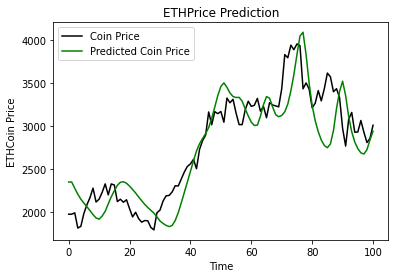

Epoch 1/100
100/100 [==============================] - 9s 32ms/step - loss: 0.2813
Epoch 2/100
100/100 [==============================] - 3s 32ms/step - loss: 0.0748
Epoch 3/100
100/100 [==============================] - 3s 32ms/step - loss: 0.0839
Epoch 4/100
100/100 [==============================] - 3s 31ms/step - loss: 0.0752
Epoch 5/100
100/100 [==============================] - 3s 31ms/step - loss: 0.0885
Epoch 6/100
100/100 [==============================] - 3s 32ms/step - loss: 0.0626
Epoch 7/100
100/100 [==============================] - 3s 32ms/step - loss: 0.0636
Epoch 8/100
100/100 [==============================] - 3s 32ms/step - loss: 0.0658
Epoch 9/100
100/100 [==============================] - 3s 32ms/step - loss: 0.0710
Epoch 10/100
100/100 [==============================] - 3s 31ms/step - loss: 0.0792
Epoch 11/100
100/100 [==============================] - 3s 32ms/step - loss: 0.0632
Epoch 12/100
100/100 [==============================] - 3s 32ms/step - loss: 0.0626
E

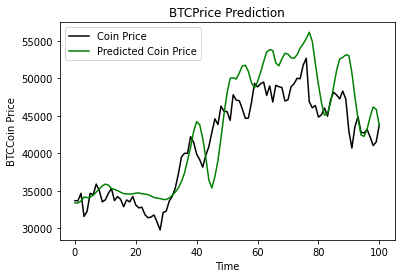

Epoch 1/100
48/48 [==============================] - 5s 27ms/step - loss: 0.6290
Epoch 2/100
48/48 [==============================] - 1s 26ms/step - loss: 0.2687
Epoch 3/100
48/48 [==============================] - 1s 27ms/step - loss: 0.2476
Epoch 4/100
48/48 [==============================] - 1s 26ms/step - loss: 0.2632
Epoch 5/100
48/48 [==============================] - 1s 26ms/step - loss: 0.2271
Epoch 6/100
48/48 [==============================] - 1s 26ms/step - loss: 0.2332
Epoch 7/100
48/48 [==============================] - 1s 26ms/step - loss: 0.2102
Epoch 8/100
48/48 [==============================] - 1s 26ms/step - loss: 0.2045
Epoch 9/100
48/48 [==============================] - 1s 26ms/step - loss: 0.2190
Epoch 10/100
48/48 [==============================] - 1s 26ms/step - loss: 0.1890
Epoch 11/100
48/48 [==============================] - 1s 26ms/step - loss: 0.1988
Epoch 12/100
48/48 [==============================] - 1s 26ms/step - loss: 0.1955
Epoch 13/100
48/48 [=====

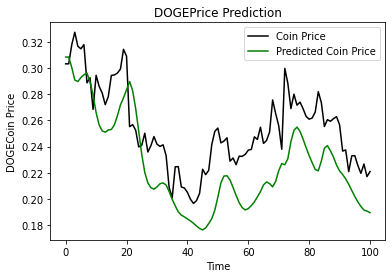

Epoch 1/100
51/51 [==============================] - 6s 32ms/step - loss: 0.5961
Epoch 2/100
51/51 [==============================] - 2s 32ms/step - loss: 0.2593
Epoch 3/100
51/51 [==============================] - 2s 32ms/step - loss: 0.2367
Epoch 4/100
51/51 [==============================] - 2s 32ms/step - loss: 0.2252
Epoch 5/100
51/51 [==============================] - 2s 32ms/step - loss: 0.2195
Epoch 6/100
51/51 [==============================] - 2s 32ms/step - loss: 0.2307
Epoch 7/100
51/51 [==============================] - 2s 32ms/step - loss: 0.2055
Epoch 8/100
51/51 [==============================] - 2s 32ms/step - loss: 0.2048
Epoch 9/100
51/51 [==============================] - 2s 33ms/step - loss: 0.2141
Epoch 10/100
51/51 [==============================] - 2s 32ms/step - loss: 0.1725
Epoch 11/100
51/51 [==============================] - 2s 32ms/step - loss: 0.1605
Epoch 12/100
51/51 [==============================] - 2s 32ms/step - loss: 0.1347
Epoch 13/100
51/51 [=====

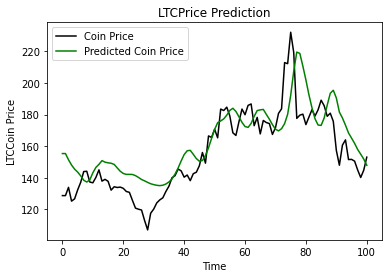

Epoch 1/100
145/145 [==============================] - 10s 33ms/step - loss: 0.4379
Epoch 2/100
145/145 [==============================] - 5s 33ms/step - loss: 0.2174
Epoch 3/100
145/145 [==============================] - 5s 33ms/step - loss: 0.1974
Epoch 4/100
145/145 [==============================] - 5s 33ms/step - loss: 0.2092
Epoch 5/100
145/145 [==============================] - 5s 32ms/step - loss: 0.1829
Epoch 6/100
145/145 [==============================] - 5s 33ms/step - loss: 0.1491
Epoch 7/100
145/145 [==============================] - 5s 33ms/step - loss: 0.1726
Epoch 8/100
145/145 [==============================] - 5s 32ms/step - loss: 0.1687
Epoch 9/100
145/145 [==============================] - 5s 33ms/step - loss: 0.1107
Epoch 10/100
145/145 [==============================] - 5s 32ms/step - loss: 0.1190
Epoch 11/100
145/145 [==============================] - 5s 32ms/step - loss: 0.1062
Epoch 12/100
145/145 [==============================] - 5s 32ms/step - loss: 0.1026


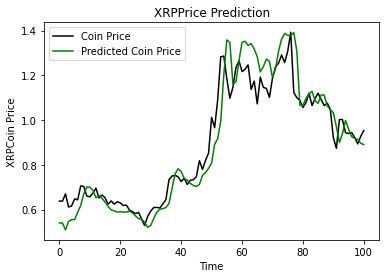

In [30]:
# check predictions from the modal
pred = {}
for x in X_test_data:
  LSTM_reg = create_lstm_reg(X_train_data[x], y_train_data[x])
  pred[x] = LSTM_reg.predict(X_test_data[x])
  scaler.fit(np.array(all_dfs[x]['Close']).reshape(-1,1))
  pred[x] = scaler.inverse_transform(pred[x]) 
  y_test_data[x] = scaler.inverse_transform(np.array(y_test_data[x]).reshape(-1,1))
  print_lstm_modal(y_test_data[x], pred[x], x)